<AxesSubplot:xlabel='class', ylabel='age'>

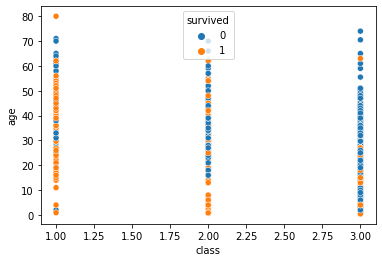

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
#sns.set_theme()

passengers = pd.read_csv("https://exampledata.netlify.app/titanic.csv")

passengers['age'].fillna(passengers['age'].mean(), inplace=True)

passengers.drop(['name','cabin','ticket'], axis=1, inplace=True)

passengers = pd.get_dummies(passengers)

sns.scatterplot(x='class', y='age', data=passengers, hue='survived')

0.7932203389830509

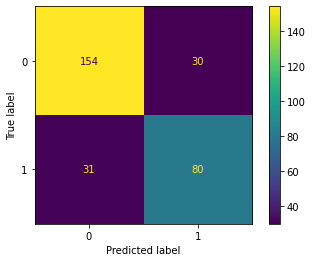

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression()

features = ['class', 'age', 'sex_female']

X = passengers[features]
y = passengers['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)

clf.score(X_test, y_test)

0.7796610169491526

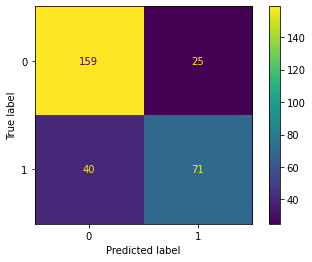

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)
clf.score(X_test, y_test)

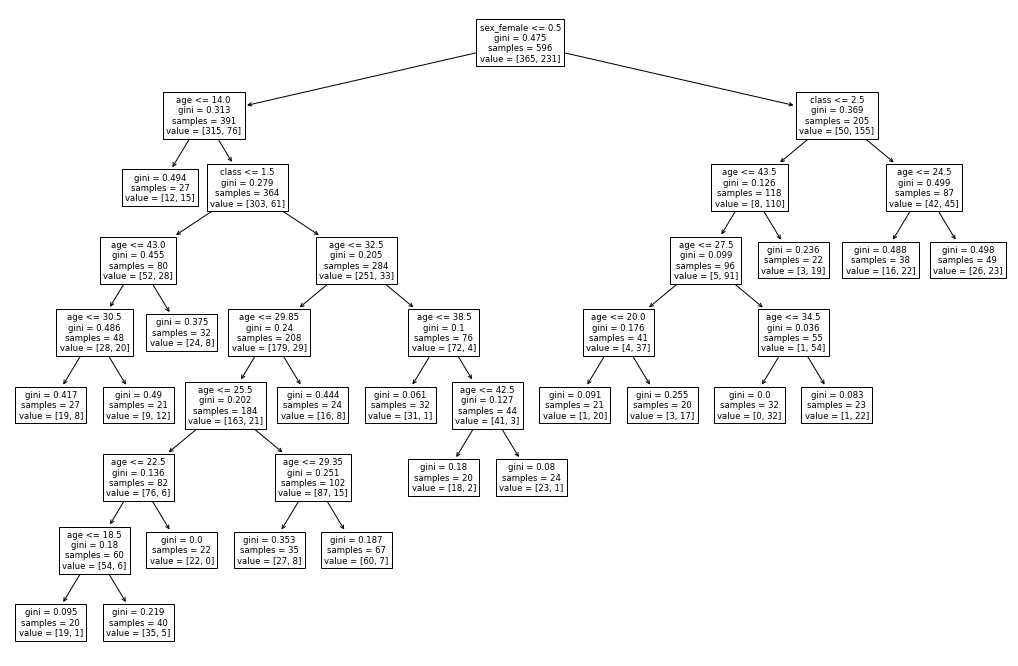

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,12))
tree = plot_tree(clf, feature_names=features)


In [20]:
features

['class', 'age', 'sex_female']